### Before Word Embedding

* Bag of Words - It means that if I have a word called "embedding" and I wish to represent this word in numbers. The only way to do this is through One Hot Vector Representation. It means I will have a list of words as vocabulary. 

* Here I presume that the vocab_size = 5000 and this word embedding falls somewhere around 1355 location in that vocab.

* Vector of Embedding = [0, 0, 0, .......1, 0, 0,0,0,00.....]

* Vector of Word = [0, 0, 0, ....0, 0,0,0,0, 0, 1, 0, 0.....]. This location is 3955.

## Shortcomings of the Representation of the Word using BOW or One Hot Vector

* More Memory is needed for processing.
* Sparsh Matrix ~ most likely that the output/performance will not be upto the mark...
* Lacking **Semantic Understanding** - This means that the BoW model is not able to understand that these two words are similar.

In BOW Context, Word Independently will not be able to create relations or linkage with the other words.
This means I need to not only look into the word in isolation but look it into a sentence form.


### Then follows an experiment....

* take this word vector and pass it into a neural net and lets see what happens...
* Input Layer --> Hidden layers --> Output Layer. When we train a model, we apply backpropogation to fine tune the weigts of the model such that the difference between actual y and the yhat reduces i.e. the cost function gets optimized or in simple words, the error reduces.
* In this due process, the model learnt???
* The learning is nothing but the fine tuning of the weights and these fine tuned weights are the embedding values of the model.

Some Examples of the models that we see today - Word2Vec,Glove, FASTEXT, Bert Embedding (Transformers|Encoder Model), Open AI Embeddings, Gemini Embeddings followed by LLAMA Embeddings.

* The basic Embedding model came into Keras...

In [3]:
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot

In [7]:
sentences = ["The pineapple juice", "A cup of tea", "The coffee is amazing", " I am a very good boy", 
           "You are a liar", "The girls are generally amazing", "Bangalore is colder"]

In [8]:
sentences

['The pineapple juice',
 'A cup of tea',
 'The coffee is amazing',
 ' I am a very good boy',
 'You are a liar',
 'The girls are generally amazing',
 'Bangalore is colder']

In [22]:
# Define the Vocab Size
vocab_size = 5000

# Represent our sentences into one_hot vectors...
onehot_repr = [one_hot(word, vocab_size) for word in sentences]
print(onehot_repr)

[[3057, 4723, 3055], [1069, 4991, 3490, 4460], [3057, 1393, 3396, 4340], [3987, 3406, 1069, 2434, 2985, 1306], [1549, 1432, 1069, 4103], [3057, 1860, 1432, 1726, 4340], [1260, 3396, 1892]]


### Padding

* In One Hot Encoding Representation, it is quite likely that the sentences will not have the same length.
* In order to trim all the sentences into a fixed length, I will have to cut down some pieces of text.
* This is not necessary to trim the sentences as per min length....we can take the max length and pad the remaining vectors accordingly.
* Types of Padding - **pre** and **post**.
* prepadding example - [0,0,0,3057, 4723, 3055] and the vice versa is the post padding

## Word Embedding Representation

In [23]:
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [24]:
import numpy as np

In [25]:
# Padding of the Sentences to ensure the same vector length for the NN Model
sent_length = 6
embedded_docs = pad_sequences(onehot_repr, padding = "post", maxlen = sent_length)
print(embedded_docs)

[[3057 4723 3055    0    0    0]
 [1069 4991 3490 4460    0    0]
 [3057 1393 3396 4340    0    0]
 [3987 3406 1069 2434 2985 1306]
 [1549 1432 1069 4103    0    0]
 [3057 1860 1432 1726 4340    0]
 [1260 3396 1892    0    0    0]]


In [30]:
# Neural Model Model

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length = sent_length))
model.compile("adam", "mse")

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 10)             50000     
                                                                 
Total params: 50000 (195.31 KB)
Trainable params: 50000 (195.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
import pandas as pd
print(model.predict(embedded_docs))

1/1 [==============================] - 0s 16ms/step
[[[-1.6316451e-02  7.3704123e-03  5.8695897e-03 -4.3116260e-02
   -7.2059780e-04 -1.1023510e-02  1.6039554e-02  3.9135925e-03
   -8.9379437e-03  8.9781769e-03]
  [-2.5842965e-02 -8.7466724e-03  4.5158155e-03 -3.2152906e-02
   -1.4995169e-02  3.1674411e-02 -2.0360613e-02  3.4515057e-02
    3.9713550e-02 -1.3732839e-02]
  [-3.7588585e-02  1.3056878e-02 -4.8174132e-02 -1.3593674e-02
   -2.6691949e-02 -2.9535843e-02 -3.2106772e-02  3.3336375e-02
   -3.9746858e-02  1.6169373e-02]
  [-2.9691173e-02  3.3370446e-02  2.6996359e-03  1.6234517e-03
   -1.9880645e-03  3.8077537e-02 -4.0404618e-02 -1.4006339e-02
   -4.0366102e-02  3.4179654e-02]
  [-2.9691173e-02  3.3370446e-02  2.6996359e-03  1.6234517e-03
   -1.9880645e-03  3.8077537e-02 -4.0404618e-02 -1.4006339e-02
   -4.0366102e-02  3.4179654e-02]
  [-2.9691173e-02  3.3370446e-02  2.6996359e-03  1.6234517e-03
   -1.9880645e-03  3.8077537e-02 -4.0404618e-02 -1.4006339e-02
   -4.0366102e-02  3.4

### Summary

* Output of the Word Embedding depends on the Input and the Output Dimensions
* This has a direct correlation with the number of hidden layers and the neurons in the model.
* Higher the Layers and the No of Neurons, most likely the model will be able to capture more and interesting patterns from the data
* This solves the problem of Semantic meaning because now the embedding can be applied on the whole sentence.
* Thus, it becomes easy for the model to capture the meaning of the words and not just words.

In a nutshell, the models like Open AI Embeddings and DeepSeek Embeddings are more robust than Word2Vec.

## You know the Word by the Kind of Company it keeps


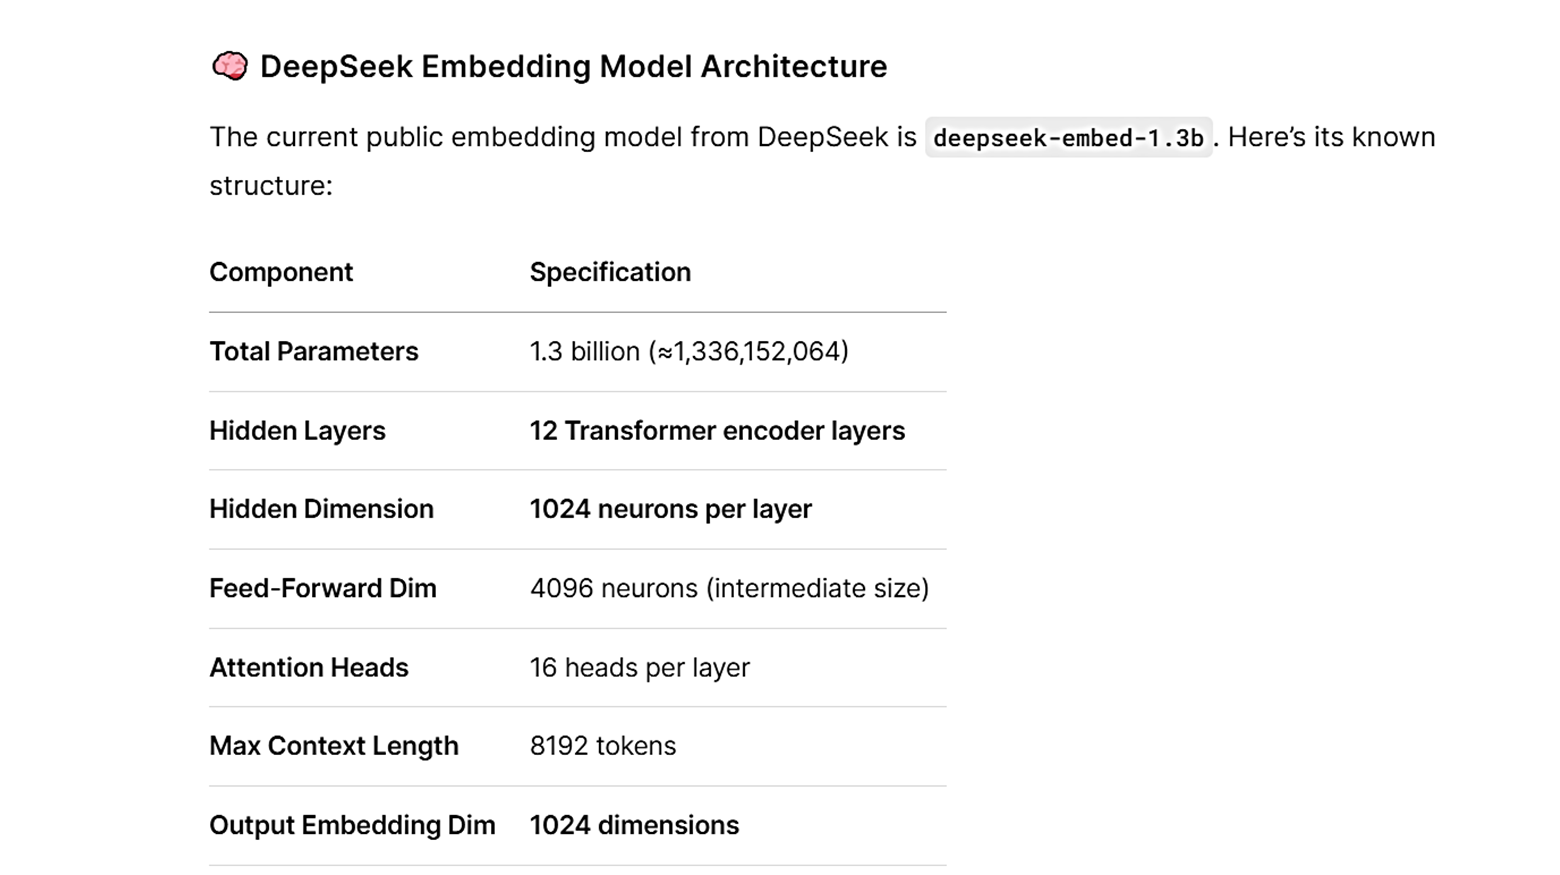

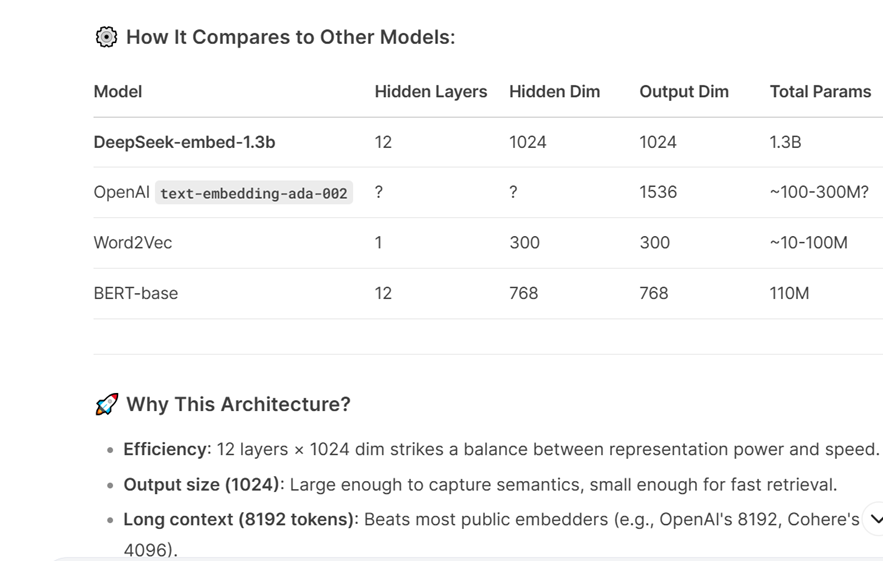

In [36]:
king = np.array([1.0, 0.8, 0.1])
queen = np.array([1.0, 0.8, -0.1])

man = np.array([0.9, 0.7, 0.2])
woman = np.array([0.9, 0.7, -0.2])

king-man+woman # represents queen

array([ 1. ,  0.8, -0.3])

In [43]:
# Cosine Similarity...

tea = np.array([-2.9709065e-02,4.9358819e-02,-2.1343455e-03,-1.5429258e-03,
    1.3314631e-02,5.0515048e-03,-2.5330735e-02,3.7583839e-02,
    1.4156256e-02,-9.3910806e-03])

coffee = np.array([-4.4046905e-02, 3.9216876e-03,-6.1538331e-03,3.6593366e-02,
    1.9724909e-02,-1.6562067e-02,3.7564684e-02,1.7635752e-02,
    4.8850786e-02,-4.7663338e-03])

In [44]:
from numpy import dot
from numpy.linalg import norm # calculates the magnitude

num = dot(tea, coffee)
deno = norm(tea)*norm(coffee)

cosine = num/deno
cosine

0.30188891914900584

### Word Embedding using Glove

In [45]:
!pip install -q gensim

In [46]:
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-100")

[=========-----------------------------------------] 18.3% 23.4/128.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.0% 57.6/128.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.9% 97.2/128.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 128.1/128.1MB downloaded


In [48]:
king = model["king"]
queen = model["queen"]
servant = model["servant"]

In [49]:
# Cosine Similarity between King and Queen
num = dot(king, queen)
deno = norm(king)*norm(queen)
cosine = num/deno
cosine

0.7507691

In [50]:
a = dot(king, servant)
b = norm(king)*norm(servant)
cosine = a/b
cosine

0.35458705

In [51]:
servant

array([ 0.026731,  0.08897 ,  0.22949 ,  0.14561 , -0.33022 ,  0.64108 ,
       -0.38384 , -0.33864 ,  0.1305  ,  0.31265 , -0.25798 , -0.078492,
        0.85147 ,  0.84577 , -0.4093  , -0.5178  ,  0.61877 , -0.085062,
       -0.38725 ,  1.025   ,  0.062989, -0.24769 , -0.359   , -0.76899 ,
        0.5491  , -0.20741 , -0.70376 , -0.42905 ,  0.24375 ,  0.22037 ,
       -0.033687, -0.050673,  0.30506 , -0.93329 , -0.41012 ,  0.39994 ,
       -0.97422 ,  0.34118 ,  0.60593 , -0.14766 , -0.35973 ,  0.31667 ,
        0.73643 , -0.20754 ,  0.4534  , -0.15822 , -0.49716 , -0.051381,
        0.19382 , -0.1419  , -0.21258 , -0.58487 ,  0.50814 ,  1.2359  ,
       -0.33448 , -0.23846 , -0.27179 , -0.08773 ,  0.49517 ,  0.1249  ,
        0.69138 , -0.53292 , -0.88402 , -0.20613 ,  0.30867 , -0.45221 ,
        0.30229 ,  0.087447,  0.84688 ,  0.24617 ,  0.41871 ,  0.14607 ,
        0.28084 , -0.36557 ,  0.15239 ,  0.32896 , -0.050407, -0.16143 ,
       -0.035523, -0.40634 ,  0.081614,  0.63956 , 

In [53]:
man = model["man"]
woman = model["woman"]

new_vector = king - man +woman

In [55]:
a = dot(queen, new_vector)
b = norm(queen)*norm(new_vector)
cosine = a/b
cosine

0.7834415

In [56]:
a = dot(servant, new_vector)
b = norm(servant)*norm(new_vector)
cosine = a/b
cosine

0.34944683

In [57]:
a = dot(queen, servant)
b = norm(queen)*norm(servant)
cosine = a/b
cosine

0.41870776